In [25]:
import pandas as pd
from src.model.dkdn import DkDN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [15]:
data = pd.read_parquet('../data/w1a.parquet')

# Preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(data.drop(columns=['y']))
y = data.y.values

y[y == -1] = 0
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [16]:
dkdn_complexity = DkDN(k=3, n_jobs = -1)

In [17]:
dkdn_complexity.fit(X_train, y_train)

In [18]:
complexity = dkdn_complexity.complexity

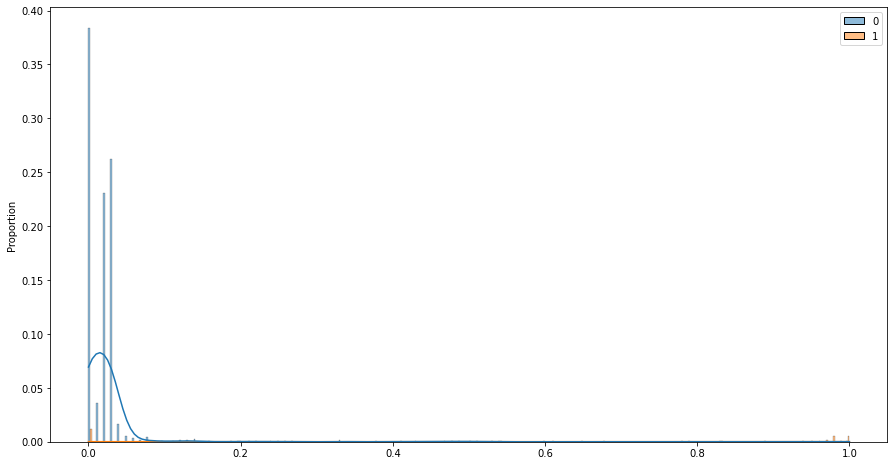

In [23]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [26]:
methods = {'SVC': SVC, 
           'KNeighborsClassifier': KNeighborsClassifier, 
           'RandomForestClassifier': RandomForestClassifier, 
           'GradientBoostingClassifier': GradientBoostingClassifier}

In [33]:
for method in methods:
    print(methods[method])

<class 'sklearn.svm._classes.SVC'>
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
